In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav
from math import *

In [2]:
threshold = 5000
energy_classes = 20
(rate, signal) = wav.read("../test_sample.wav", False)

wave_data = [signal[i][0] if signal[i][0] >= threshold else 0 for i in range(len(signal))]

<BarContainer object of 10 artists>

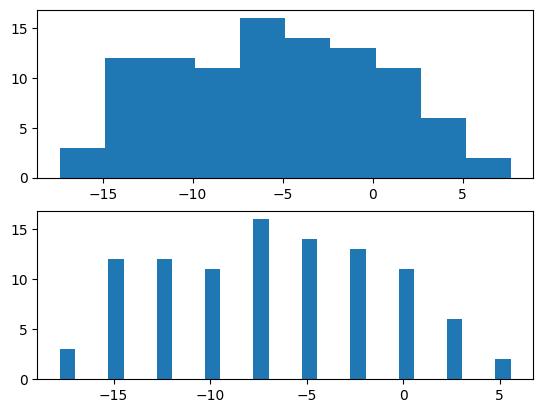

In [3]:
class EnergyClass:
    e_mix: float
    e_max: float
    freq: int

    def __init__(self, e_min: float, e_max: float):
        self.e_min = e_min
        self.e_max = e_max
        self.freq = 0

def calculate_frequencies(data: list, n_bins: int, _filter = lambda _: True) -> list:
    m = min(data)
    bin_width = (max(data) - min(data)) / n_bins
    histogram = [ EnergyClass(m + i * bin_width, m + (i+1) * bin_width) for i in range(n_bins) ]
    filtered = filter(_filter, data)
    for value in filtered:
        for bin in histogram:
            if value >= bin.e_min and value < bin.e_max:
                bin.freq += 1
    return histogram


# TEST

n_bins = 10
sample = [np.random.normal(-5,5) for _ in range(0,100,1)]
results = calculate_frequencies(sample, n_bins)
bar_data = []

for bin in results:
    bar_data.append([bin.e_min, bin.freq])

fig, axs = plt.subplots(2)
# axs[1].plot(sample, '*')
axs[0].hist(sample, bins=n_bins)
axs[1].bar([entry[0] for entry in bar_data], [entry[1] for entry in bar_data])

class:	0.000, 1638.350	freq: 0.000
class:	1638.350, 3276.700	freq: 0.000
class:	3276.700, 4915.050	freq: 0.000
class:	4915.050, 6553.400	freq: 596.000
class:	6553.400, 8191.750	freq: 190.000
class:	8191.750, 9830.100	freq: 42.000
class:	9830.100, 11468.450	freq: 13.000
class:	11468.450, 13106.800	freq: 8.000
class:	13106.800, 14745.150	freq: 1.000
class:	14745.150, 16383.500	freq: 4.000
class:	16383.500, 18021.850	freq: 3.000
class:	18021.850, 19660.200	freq: 1.000
class:	19660.200, 21298.550	freq: 4.000
class:	21298.550, 22936.900	freq: 2.000
class:	22936.900, 24575.250	freq: 2.000
class:	24575.250, 26213.600	freq: 1.000
class:	26213.600, 27851.950	freq: 0.000
class:	27851.950, 29490.300	freq: 3.000
class:	29490.300, 31128.650	freq: 2.000
class:	31128.650, 32767.000	freq: 1.000


/home/chiara/dev/beta_detector/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/chiara/dev/beta_detector/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


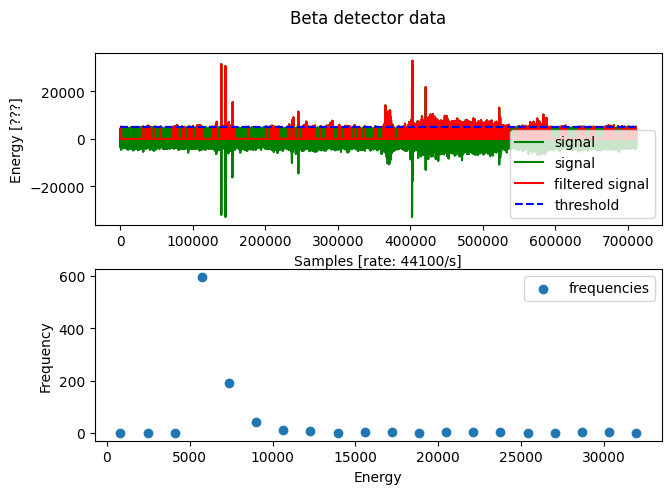

In [4]:
t = np.linspace(0,len(signal),len(signal))
frequencies = calculate_frequencies(wave_data, energy_classes, lambda e: abs(e) >= threshold)

for f in frequencies:
    print(f"class:\t{f.e_min:.3f}, {f.e_max:.3f}\tfreq: {f.freq:.3f}")

fig, axs = plt.subplots(2) # vertically stacked
fig.suptitle("Beta detector data")
fig.tight_layout()

axs[0].set_xlabel(f"Samples [rate: {rate}/s]")
axs[0].set_ylabel("Energy [???]")
axs[0].plot(t, signal, 'g', label='signal')
axs[0].plot(t, wave_data, 'r', label='filtered signal')
axs[0].plot(t, [threshold for _ in range(len(signal))], 'b--', label='threshold')
axs[0].legend()

axs[1].set_xlabel("Energy")
axs[1].set_ylabel("Frequency")
axs[1].scatter([(f.e_max + f.e_min) // 2 for f in frequencies], [f.freq for f in frequencies], label='frequencies') # bro why isn't this plotting anything...?
# axs[1].bar([i for i in range(len(frequencies))], [f.freq for f in frequencies], label='frequencies') # bro why isn't this plotting anything...?
axs[1].legend()

# axs[2].hist(list(filter(lambda e: abs(e) >= threshold, wave_data)), bins=energy_classes, label='Frequency')

## Testing matplotlib

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# phase = 0.1
# x = np.linspace(0,10,100)
# y = np.sin(x + phase)
# 
# plt.ion()
# plt.plot(x,y, 'r-')
# plt.show()
# 
# for t in np.linspace(1,10*np.pi,100):
    # phase += t;

plt.ion() # interactive plots on
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0,10,50)
graph1, = ax.plot(x,np.sin(x),'r-')

for phase in np.linspace(0, 10*np.pi, 500):
    graph1.set_ydata([np.sin(x + phase)])
    fig.canvas.draw()
    fig.show()
    # plt.pause(interval=0.001)
    fig.canvas.flush_events()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()